In [52]:
from datetime import datetime
import matplotlib.mlab as mlab
import matplotlib.pyplot as pyplot
import pandas as pd
import sqlite3

dbname = "Group24_NS_Project.db"
conn = sqlite3.connect(dbname)
db_data = pd.read_sql_query("SELECT * FROM pcap_16_09_28", conn)

In [4]:
mac_devices = #taken from the opensource website
{'d0:52:a8:00:67:5e': ['Smart Things'],
 '44:65:0d:56:cc:d3': ['Amazon Echo'],
 '70:ee:50:18:34:43': ['Netatmo Welcome'],
 'f4:f2:6d:93:51:f1': ['TP-Link Day Night Cloud camera'],
 '00:16:6c:ab:6b:88': ['Samsung SmartCam'],
 '30:8c:fb:2f:e4:b2': ['Dropcam'],
 '00:62:6e:51:27:2e': ['Insteon Camera'],
 'e8:ab:fa:19:de:4f': ['Insteon Camera'],
 '00:24:e4:11:18:a8': ['Withings Smart Baby Monitor'],
 'ec:1a:59:79:f4:89': ['Belkin Wemo switch'],
 '50:c7:bf:00:56:39': ['TP-Link Smart plug'],
 '74:c6:3b:29:d7:1d': ['iHome'],
 'ec:1a:59:83:28:11': ['Belkin wemo motion sensor'],
 '18:b4:30:25:be:e4': ['NEST Protect smoke alarm'],
 '70:ee:50:03:b8:ac': ['Netatmo weather station'],
 '00:24:e4:1b:6f:96': ['Withings Smart scale'],
 '74:6a:89:00:2e:25': ['Blipcare Blood Pressure meter'],
 '00:24:e4:20:28:c6': ['Withings Aura smart sleep sensor'],
 'd0:73:d5:01:83:08': ['Light Bulbs LiFX Smart Bulb'],
 '18:b7:9e:02:20:44': ['Triby Speaker'],
 'e0:76:d0:33:bb:85': ['PIX-STAR Photo-frame'],
 '70:5a:0f:e4:9b:c0': ['HP Printer'],
 '08:21:ef:3b:fc:e3': ['Samsung Galaxy Tab'],
 '30:8c:fb:b6:ea:45': ['Nest Dropcam'],
 '40:f3:08:ff:1e:da': ['Android Phone'],
 '74:2f:68:81:69:42': ['Laptop'],
 'ac:bc:32:d4:6f:2f': ['MacBook'],
 'b4:ce:f6:a7:a3:c2': ['Android Phone 1'],
 'd0:a6:37:df:a1:e1': ['IPhone'],
 'f4:5c:89:93:cc:85': ['MacBook/Iphone'],
 '14:cc:20:51:33:ea': ['TPLink Router Bridge LAN (Gateway)']}

mac_devices

{'d0:52:a8:00:67:5e': ['Smart Things'],
 '44:65:0d:56:cc:d3': ['Amazon Echo'],
 '70:ee:50:18:34:43': ['Netatmo Welcome'],
 'f4:f2:6d:93:51:f1': ['TP-Link Day Night Cloud camera'],
 '00:16:6c:ab:6b:88': ['Samsung SmartCam'],
 '30:8c:fb:2f:e4:b2': ['Dropcam'],
 '00:62:6e:51:27:2e': ['Insteon Camera'],
 'e8:ab:fa:19:de:4f': ['Insteon Camera'],
 '00:24:e4:11:18:a8': ['Withings Smart Baby Monitor'],
 'ec:1a:59:79:f4:89': ['Belkin Wemo switch'],
 '50:c7:bf:00:56:39': ['TP-Link Smart plug'],
 '74:c6:3b:29:d7:1d': ['iHome'],
 'ec:1a:59:83:28:11': ['Belkin wemo motion sensor'],
 '18:b4:30:25:be:e4': ['NEST Protect smoke alarm'],
 '70:ee:50:03:b8:ac': ['Netatmo weather station'],
 '00:24:e4:1b:6f:96': ['Withings Smart scale'],
 '74:6a:89:00:2e:25': ['Blipcare Blood Pressure meter'],
 '00:24:e4:20:28:c6': ['Withings Aura smart sleep sensor'],
 'd0:73:d5:01:83:08': ['Light Bulbs LiFX Smart Bulb'],
 '18:b7:9e:02:20:44': ['Triby Speaker'],
 'e0:76:d0:33:bb:85': ['PIX-STAR Photo-frame'],
 '70:5a:0f:e

In [ ]:
device_mapping = {}

for i in mac_devices.keys():   #create a mapping of the devices
    device_mapping[i] = []
    
# print(device_mapping)
# print(type(db_data['Time']))

temp_list = list(device_mapping.keys())
for index, row in db_data.iterrows():
    if row['MAC_Dst'] in device_mapping:
        temp_item = list(row)
        temp_item.append(temp_list.index(row['MAC_Dst']))
        device_mapping[row['MAC_Dst']].append(temp_item)
    if row['MAC_Src'] in device_mapping:
        temp_item = list(row)
        temp_item.append(temp_list.index(row['MAC_Src']))
        device_mapping[row['MAC_Src']].append(temp_item)

In [13]:
dbname = "Group24_NS_Project.db"
conn = sqlite3.connect(dbname)
csor = conn.cursor()

cmd = "create table if not exists Feature_Set(ActiveVol int, PktAmt int, ActiveTime int, SleepTime int, Ports int, DNSreq int, NTPreq int, DNSinterval real, NTPinterval real, AvgPktSize real, MeanRate real, DeviceIdfy text)"
csor.execute(cmd)

In [ ]:
for i in device_mapping.keys():
    df = pd.DataFrame(device_mapping[i], columns = ['ID', 'Time', 'Size', 'MAC_Src', 'MAC_Dst', 'IP_Src', 'IP_Dst', 'Protocol_IP', 'Port_Src', 'Port_Dst', 'DeviceIdfy'])
    
    if df.empty:
        continue
    
    vals = []   #initialise the vals list
    vals.append(0)
    vals.append(0)
    vals.append(0)
    vals.append(0)
    vals.append(set())
    vals.append(0)
    vals.append(0)
    vals.append(0)
    vals.append([])
    vals.append([])
    data = []
    start_time = df['Time'][0]
    interval_time = 60 * 30 #1800 seconds - 30 mins interval/session
    prev_time = 0
    device_identity = df['DeviceIdfy'][0]
    
    for index, row in df.iterrows():
        if row['Time'] >= start_time + interval_time:
            start_time = start_time + interval_time
            vals[3] = interval_time - vals[2]   #sleep time = totaltime - active time
            vals[5] = len(vals[4])  #number of unique ports
            
            if len(vals[8]) == 0:   #NTP interval
                vals[8] = 0
            else:
                vals[8] = (vals[8][-1] - vals[8][0]) / len(set(vals[8]))  #calc avg NTP interval
                
            if len(vals[9]) == 0:  #DNS interval
                vals[9] = 0
            else:
                vals[9] = (vals[9][-1] - vals[9][0]) / len(set(vals[9]))  #calc avg DNS interval
            del vals[4]  #redundant value
            data.append(vals)
            vals = [0, 0, 0, 0, set(), 0, 0, 0, [], []]  #reset values
        
        if prev_time != row['Time']:  #check if multiple packets arrive at same time
            prev_time = row['Time']   #update the time
            vals[0] += row['Size']
            vals[1] += 1
            vals[2] += 1      #then increment the active time
            vals[4].add(row['Port_Src'])
            vals[4].add(row['Port_Dst'])
            
            if row['Port_Src'] == 123 or row['Port_Dst'] == 123:  #append the NTP values
                if row['Port_Src'] == 123:
                    vals[9].append(row['Time'])
                vals[7] += 1      #incement the NTP request
            if row['Port_Src'] == 53 or row['Port_Dst'] == 53:   #append the DNS values
                if row['Port_Src'] == 53:
                    vals[8].append(row['Time'])
                vals[6] += 1       #incement the DNS request
        else:
            vals[4].add(row['Port_Src'])
            vals[4].add(row['Port_Dst'])
            vals[0] += row['Size']
            vals[1] += 1       #then dont increment the active time
            if row['Port_Src'] == 123 or row['Port_Dst'] == 123:
                if row['Port_Src'] == 123:
                    vals[9].append(row['Time'])
                vals[7] += 1
            if row['Port_Src'] == 53 or row['Port_Dst'] == 53:
                if row['Port_Src'] == 53:
                    vals[8].append(row['Time'])
                vals[6] += 1
                
    cmd = "insert into Feature_Set(ActiveVol , PktAmt , ActiveTime , SleepTime , Ports , DNSreq , NTPreq , DNSinterval , NTPinterval , AvgPktSize , MeanRate , DeviceIdfy) values(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
    for item in data:
        item.append(item[0]/item[1])   #calc avg packet size
        item.append(item[0] / (1024 * item[1]))    #Mean rate
        item.append(str(device_identity))    #Device ID
        csor.execute(cmd, item)
    conn.commit()

conn.close()

In [72]:
#EXTRACT info of devices
dbname = "Group24_NS_Project.db"
conn = sqlite3.connect(dbname)

In [73]:
#For Iot Device
df = pd.read_sql_query("SELECT * FROM Feature_Set WHERE DeviceIdfy = '18'", conn) #Light Bulb
df.head()

,ActiveVol,PktAmt,ActiveTime,SleepTime,Ports,DNSreq,NTPreq,DNSinterval,NTPinterval,AvgPktSize,MeanRate,DeviceIdfy
0,67089,564,119,1681,14,36,12,278.000000,277.833333,118.952128,0.116164,18
1,35101,317,103,1697,11,24,12,250.000000,250.000000,110.728707,0.108134,18
2,35164,329,84,1716,11,24,12,250.000000,250.000000,106.881459,0.104376,18
3,27630,256,82,1718,11,24,12,250.000000,250.000000,107.929688,0.105400,18
4,23878,216,91,1709,11,24,12,214.428571,250.000000,110.546296,0.107955,18


In [74]:
hr, mins = 7, 30 #Time starts from 7:30 am - First packet in pcap starts from this time
tmp_time = []

for i in range(len(df)):
    if mins == 0:
        tmp_time.append(hr * 100)  #scale the hrs to plot the graph
    else:
        tmp_time.append(int(str(hr) + str(mins)))
    mins += 30
    
    if mins >= 60:
        mins = 0
        hr +=1
    if hr >= 24:
        hr = 0

time, load = zip(*sorted(zip(tmp_time, df['ActiveVol'])))

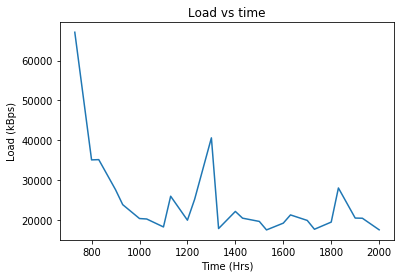

In [75]:
pyplot.plot(time, load)
pyplot.title('Load vs Time')
pyplot.xlabel('Time (Hrs)')
pyplot.ylabel('Load (kBps)')
pyplot.show()

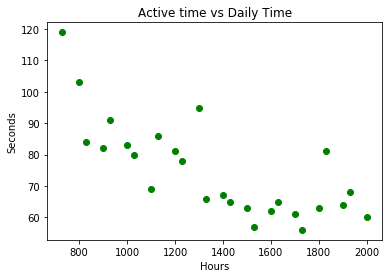

In [81]:
pyplot.plot(tmp_time, df['ActiveTime'], 'ro', color='g', label = "Active Time")
pyplot.title('Active time vs Daily Time')
pyplot.xlabel('Hours')
pyplot.ylabel('Seconds')
pyplot.show()

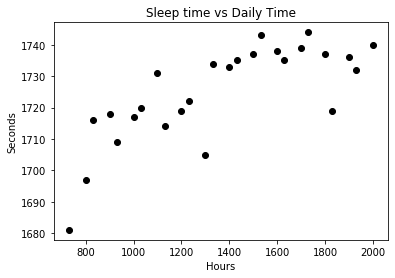

In [82]:
pyplot.plot(tmp_time, df['SleepTime'], 'ro', color='black', label = "Sleep Time")
pyplot.title('Sleep time vs Daily Time')
pyplot.xlabel('Hours')
pyplot.ylabel('Seconds')
pyplot.show()

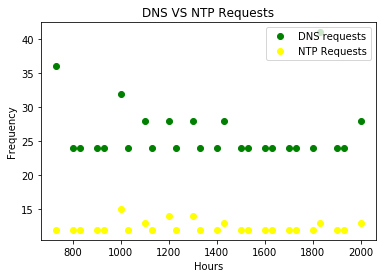

In [83]:
pyplot.plot(tmp_time, df['DNSreq'], 'ro', color='g', label = "DNS requests")
pyplot.plot(tmp_time, df['NTPreq'], 'ro', color='yellow', label = "NTP Requests")
pyplot.legend(loc="upper right")
pyplot.title('DNS VS NTP Requests')
pyplot.xlabel('Hours')
pyplot.ylabel('Frequency')
pyplot.show()

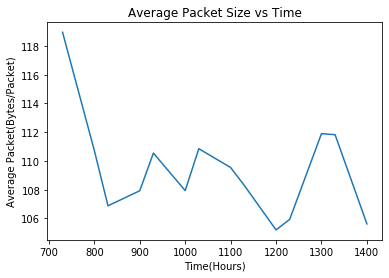

In [84]:
time, avgpkt = zip(*sorted(zip(t, df['AvgPktSize'])))
pyplot.plot(time, avgpkt)
pyplot.title('Average Packet Size vs Time')
pyplot.xlabel('Time(Hours)')
pyplot.ylabel('Average Packet(Bytes/Packet)')
pyplot.show()

In [85]:
#FOR Non-IOT Device
df = pd.read_sql_query("SELECT * FROM Feature_Set WHERE DeviceIdfy = '26'", conn) #Only Macbook was used that day
df.head()

,ActiveVol,PktAmt,ActiveTime,SleepTime,Ports,DNSreq,NTPreq,DNSinterval,NTPinterval,AvgPktSize,MeanRate,DeviceIdfy
0,168087702,182873,965,835,1361,1822,32,10.532544,106.625000,919.149913,0.897607,26
1,27733396,39457,1338,462,557,660,26,16.952381,125.923077,702.876448,0.686403,26
2,79271732,239745,1642,158,65535,2018,30,7.743119,109.333333,330.650199,0.322901,26
3,23365919,41778,1665,135,797,712,14,21.345238,229.285714,559.287639,0.546179,26
4,9955184,21849,1776,24,440,480,12,23.630137,226.833333,455.635681,0.444957,26


In [86]:
hr, mins = 7, 30 #Time starts from 7:30 am - First packet in pcap starts from this time
tmp_time = []

for i in range(len(df)):
    if mins == 0:
        tmp_time.append(hr * 100)  #scale the hrs to plot the graph
    else:
        tmp_time.append(int(str(hr) + str(mins)))
    mins += 30
    
    if mins >= 60:
        mins = 0
        hr +=1
    if hr >= 24:
        hr = 0

time, load = zip(*sorted(zip(tmp_time, df['ActiveVol'])))

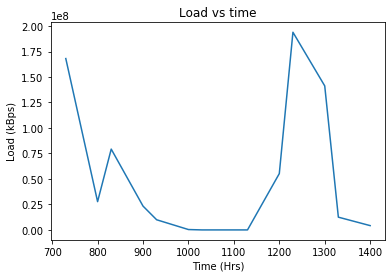

In [87]:
pyplot.plot(time, load)
pyplot.title('Load vs Time')
pyplot.xlabel('Time (Hrs)')
pyplot.ylabel('Load (kBps)')
pyplot.show()

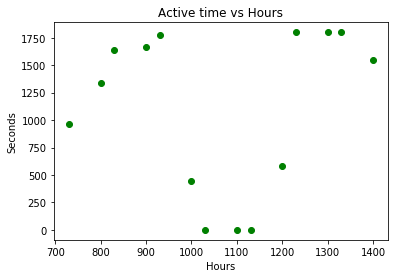

In [91]:
pyplot.plot(tmp_time, df['ActiveTime'], 'ro', color='g', label = "Active Time")
pyplot.title('Active time vs Hours')
pyplot.xlabel('Hours')
pyplot.ylabel('Seconds')
pyplot.show()

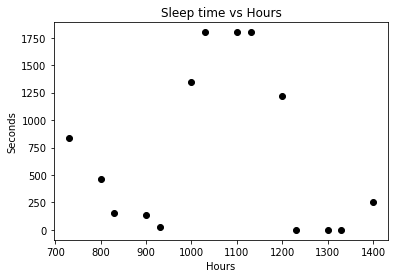

In [92]:
pyplot.plot(tmp_time, df['SleepTime'], 'ro', color='black', label = "Sleep Time")
pyplot.title('Sleep time vs Hours')
pyplot.xlabel('Hours')
pyplot.ylabel('Seconds')
pyplot.show()

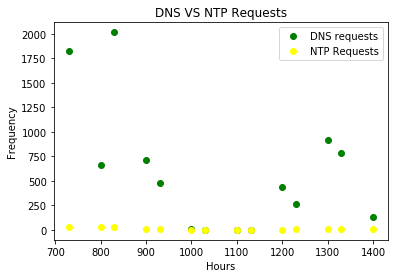

In [93]:
pyplot.plot(tmp_time, df['DNSreq'], 'ro', color='g', label = "DNS requests")
pyplot.plot(tmp_time, df['NTPreq'], 'ro', color='yellow', label = "NTP Requests")
pyplot.legend(loc="upper right")
pyplot.title('DNS VS NTP Requests')
pyplot.xlabel('Hours')
pyplot.ylabel('Frequency')
pyplot.show()

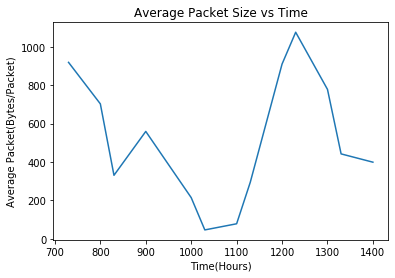

In [94]:
time, avgpkt = zip(*sorted(zip(t, df['AvgPktSize'])))
pyplot.plot(time, avgpkt)
pyplot.title('Average Packet Size vs Time')
pyplot.xlabel('Time(Hours)')
pyplot.ylabel('Average Packet(Bytes/Packet)')
pyplot.show()